# Тестовое задание на позицию Data Analyst
## Часть 3. Исследовательский анализ данных
Данные представлены в формате CSV и содержат информацию о кредитной истории клиентов.

**Цель:** провести исследовательский анализ данных и изучить влияние представленных параметров на целевые переменные.

### Описание данных
**Переменные, характеризующие кредитную историю клиента:**
- `cred_sum_cc_all` - сумма кредитов по кредитным картам
- `mfo_inqs_count_month` - количество запросов на кредиты в другие в МФО
- `all_closed_creds_sum_all` - сумма закрытых кредитов
- `bank_inqs_count_quarter` - количество запросов на кредиты в банки
- `cred_max_overdue_max_ly` - максимальная просрочка за год
- `all_active_creds_sum_all` - денежная сумма всех активных кредитов
- `mfo_last_days_all` - Количество дней с последнего займа в МФО
- `cred_sum_cc_ly` - Сумма лимитов кредитных карт, оформленных за последний год
- `cred_sum_debt_all_all` - Сумма задолженности по всем кредитам
- `all_closed_creds_sum_ly` - Сумма закрытых кредитов за последний год
- `mfo_cred_mean_sum_3lm` - Средняя сумма МФО кредитов, выданных за последние 3 месяца
- `delay_more_sum_all` - Количество просрочек более чем на 90 дней по всем кредитам
- `all_creds_count_all` - Общее количество кредитов
- `cred_day_overdue_all_sum_all` - Суммарное количество дней просрочки текущих активных кредитов
- `cred_max_overdue_max_3lm` - Максимальная сумма просроченной задолженности, по кредитам взятым за последние 3 месяца
- `mfo_closed_count_ly` - Количество закрытых МФО кредитов, взятых за последний год
- `cred_sum_overdue_cc_all` - Сумма просрочек по кредитным картам
- `count_overdue_all_3lm` - Количество кредитов на просрочке, взятых за последние 3 месяца
- `all_creds_count_lm` - Количество кредитов, взятых за последний месяц
- `region` - регион подачи заявки 

**Переменные характеризующие клиента**
- `work_code` - Профессия. 5 - рабочие профессии (слесарь, токарь). 3 - офисный работник (бухгалтер, программист). 1 - госслужащий (полицейский, медсестра)
- `month_income` - доход

**Целевые переменные:**
- `bad` - 1 - кредит просрочен, 0 - кредит возвращен, nan - отказ.
- `approved` - 1 - одобрено, 0 - отказано.

In [1]:
# необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# данные
data = pd.read_csv("D:\\Документы\\Тестовое DEVIM\\data.csv")
data.sample(5)

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
14098,6119899,0.0,2,0,0,0.0,5000,14,0.0,5000.0,...,0.0,0,0.0,0,1,3,20000,45,NaN,0
17816,6468097,83000.1,2,2412673,3,14000.0,717104,72,0.0,0.0,...,8000.0,11,0.0,2,0,4,35000,73,NaN,0
22017,6647559,0.0,0,0,0,3960.0,3960,223,0.0,0.0,...,0.0,0,0.0,0,0,3,50000,74,NaN,0
2916,5613068,0.0,0,0,1,0.0,3000,461,0.0,0.0,...,0.0,0,0.0,0,0,5,50000,60,NaN,0
3732,5649765,0.0,1,0,0,0.0,1483,27,0.0,1483.0,...,0.0,0,0.0,0,1,2,50000,20,NaN,0


### Общее представление

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23116 entries, 0 to 23115
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   order_id                      23116 non-null  int64  
 1   cred_sum_cc_all               23116 non-null  float64
 2   mfo_inqs_count_month          23116 non-null  int64  
 3   all_closed_creds_sum_all      23116 non-null  int64  
 4   bank_inqs_count_quarter       23116 non-null  int64  
 5   cred_max_overdue_max_ly       23116 non-null  float64
 6   all_active_creds_sum_all      23116 non-null  int64  
 7   mfo_last_days_all             23116 non-null  int64  
 8   cred_sum_cc_ly                23116 non-null  float64
 9   cred_sum_debt_all_all         23116 non-null  float64
 10  all_closed_creds_sum_ly       23116 non-null  int64  
 11  mfo_cred_mean_sum_3lm         23116 non-null  float64
 12  delay_more_sum_all            23116 non-null  int64  
 13  a

Неполное количество значений только в столбце *bad*, однако это объясняется особенностями его заполнения. Типы данных соответствуют ожидаемым.

### Анализ данных
В данных имеется 2 целевые переменные, отвечающие за одобрение и просрочку кредита, пара переменных, описывающих клиента (его профессию и доход), а также множество других, характеризующих его кредитную историю. Разделим исследование на несколько частей, в которых рассмотрим влияние тех или иных параметров на целевые переменные.

1. [Общие сведения](#general)
2. [Региональность заявок](#region)
3. [Профессиональная деятельность клиентов](#work_code)
4. [Доходы клиентов](#income)
5. [Кредитная история](#history)

<a id="general"></a>
#### 1. Общие сведения

В столбце *approved* содержится информация, был ли одобрен кредит по той или иной заявке. В столбце *bad* - просрочен ли он.

In [30]:
# одобренные заявки - в отдельный датафрейм
approved_data = data.loc[~data['bad'].isnull()]

In [31]:
print('Всего:', approved_data.shape[0])
print('Доля:', round(approved_data.shape[0] / data.shape[0], 2))

Всего: 7269
Доля: 0.31


Всего 31% поданных заявок на кредит были одобрены. Из них просрочено:

In [32]:
print('Всего:', data.query('bad == 1').shape[0])
print('Доля:', round(data.query('bad == 1').shape[0] / approved_data.shape[0], 2))

Всего: 1963
Доля: 0.27


Также около 30%.

In [57]:
round(data.query('bad == 0').shape[0] / data.shape[0], 2)

0.23

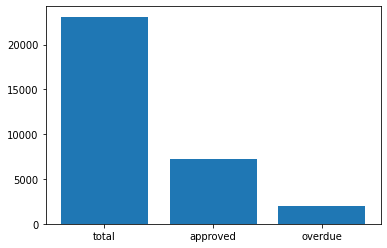

In [88]:
plt.bar(x=['total', 'approved', 'overdue'], height=[data.shape[0], approved_data.shape[0], data.query('bad==1').shape[0]])
plt.show()
plt.savefig('general.png')

Таким образом, всего 23% клиентов получили кредит и смогли вернуть его вовремя.

<a id="region"></a>
#### 2. Региональность заявок

**ТОП-10 регионов, лидирующих по количеству поданных заявок:**

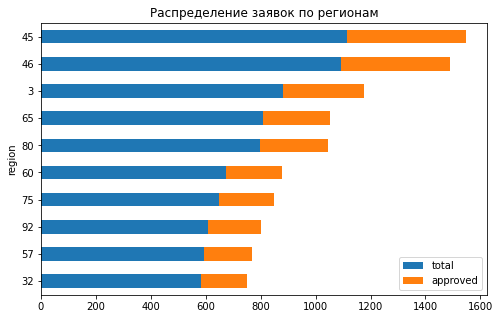

In [83]:
region_data = data.pivot_table(index='region', values='approved', aggfunc=['count', 'sum', 'mean'])

region_data.columns = ['total', 'approved', 'rate']
region_data = region_data.sort_values(by='total', ascending=True)
region_data.tail(10).plot(kind='barh', y=['total', 'approved'], stacked=True, title='Распределение заявок по регионам', figsize=(8, 5))

plt.xticks(rotation=0)
plt.savefig('top10_region_total.png')

In [20]:
region_data.sort_values(by='total', ascending=False).head(10).style.format('{:.2f}').background_gradient(cmap='Greens')

,total,approved,rate
region,,,
45,1115.00,433.00,0.39
46,1091.00,399.00,0.37
3,883.00,293.00,0.33
65,808.00,246.00,0.30
80,796.00,250.00,0.31
60,675.00,204.00,0.30
75,649.00,198.00,0.31
92,607.00,196.00,0.32
57,594.00,174.00,0.29


По количеству поданных заявок лидируют Москва (45) и Московская область (46), на третьем и четвертом местах Краснодарский край (3) и Свердловская область (65) соответственно. Они же лидируют по доле одобренных заявок среди выделенных ТОП-10, однако, не по общей совокупности регионов. 

**ТОП-5 регионов с самой высокой долей одобренных заявок:**

In [21]:
region_data.sort_values(by='rate', ascending=False).head().style.format('{:.2f}').background_gradient(cmap='Greens')

,total,approved,rate
region,,,
55,9.00,5.00,0.56
44,32.00,15.00,0.47
66,182.00,74.00,0.41
40,547.00,220.00,0.40
45,1115.00,433.00,0.39


В данном топе на первом месте находится Байконур (55) с минимальным числом зарегистрированных заявок, на втором  третьем - Магаданская (44) и Смоленская (66) области соответственно. На четвертом - Санкт-Петербург (40). Москва (45) также вошла в топ, однако, заняла последнее пятое место.

**ТОП-5 регионов с самым высоким показателем просрочки кредита:**

И в этом топе, и в следующем не будем рассматривать регионы с менее чем 20 одобренными заявками, поскольку таких данных недостаточно, чтобы делать реалистичные выводы.

In [64]:
region_approved_data = approved_data.pivot_table(index='region', values='bad', aggfunc=['count', 'sum', 'mean'])
region_approved_data.columns = ['approved', 'overdue', 'rate']
region_approved_data.query('approved > 20').sort_values(by='rate', ascending=False).head(5).style.format('{:.2f}').background_gradient(cmap='Greens')

,approved,overdue,rate
region,,,
12,57.00,27.00,0.47
32,167.00,63.00,0.38
8,80.00,29.00,0.36
42,56.00,20.00,0.36
90,28.00,10.00,0.36


На первом месте по доле просроченных кредитов - Астраханская область (12). Почти половина одобренных кредитов не возвращена вовремя. На втором и третьем - Кемеровская область (32) и Хабаровский край (8), характеризующиеся самым большим количеством одобренных заявок в топе. Четвертое и пятое места занимают Липецкая область (42) и Северная Осетия (90) соответственно.

**ТОП-5 регионов с самым низким показателем просрочки кредита:**

In [65]:
region_approved_data.query('approved > 20').sort_values(by='rate', ascending=True).head().style.format('{:.2f}').background_gradient(cmap='Greens')

,approved,overdue,rate
region,,,
78,55.00,7.00,0.13
39,40.00,6.00,0.15
54,43.00,7.00,0.16
47,54.00,9.00,0.17
83,27.00,5.00,0.19


В данный топ попали регионы с примерно равным количеством одобренных заявок. В тройку лидеров по своевременному возврату кредитов попали Ярославская (78), Калининградская (39) и Орловская (54) области. На четвертов и пятом местах - Мурманская область (47) и Кабардино-Балкарская республика (83). Больше 80% кредитов, взятых в этих республиках, не просрочены.

<a id="work_code"></a>
#### 3. Профессиональная деятельность клиентов

Посмотрим на количество принятых заявок в зависимости от специальности клиентов.

**Известные коды профессий:**

- 1 - госслужащий (полицейский, медсестра)
- 3 - офисный работник (бухгалтер, программист)
- 5 - рабочие профессии (слесарь, токарь) 

К сожалению, профессии №2 и 4 не расшифрованы.

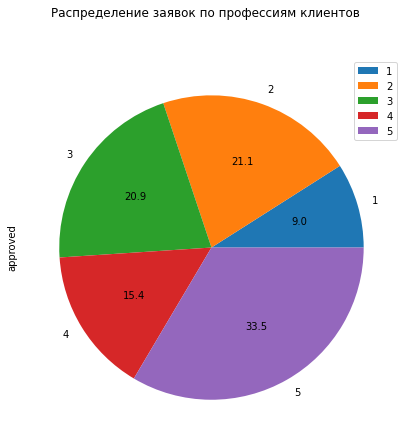

In [93]:
work_data = data.pivot_table(index='work_code', values=['approved'], aggfunc='count')
work_data.plot(kind='pie', subplots=True, autopct='%.1f', title='Распределение заявок по профессиям клиентов', figsize=(7, 7))

plt.xticks(rotation=0)
plt.savefig('work_pie.png')

In [68]:
# доля одобренных заявок и кредитов, которые просрочили
(
    data
    .pivot_table(index='work_code', values=['approved', 'bad'])
    .style.format('{:.2f}')
    .highlight_max(subset=['approved'], color='yellowgreen')
    .highlight_min(subset=['approved'], color='coral')
    .highlight_max(subset=['bad'], color='coral')
    .highlight_min(subset=['bad'], color='yellowgreen')
)

,approved,bad
work_code,,
1,0.42,0.20
2,0.39,0.26
3,0.23,0.25
4,0.34,0.25
5,0.28,0.32


Наибольшее количество заявок было подано представителями рабочих профессий (код 5). При этом, одобрено из них всего около 28%. Больший процент отказов характерен лишь для офисных сотрудников (код 3) - 23%. Меньше же всего заявок получено от госслужащих (код 1). Но несмотря на это, кредиты выдавались им более охотно: около половины поданных заявок было одобрено. Вероятно, это связано с тем, что госслужащие чаще остальных возвращают долги вовремя, поэтому и доверяют им гораздо больше, чем представителям рабочих профессий, процент просроченных кредитов у которых максимален.

<a id="income"></a>
#### 4. Доходы клиентов
Что касается **распределения по доходам:**

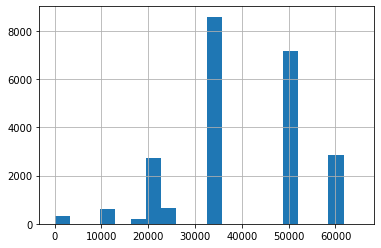

In [94]:
# гистограмма распределения дохода в датасете
data['month_income'].hist(bins=20)
plt.savefig('income_hist.png')

In [11]:
# объединяет клиентов в группы по категориям дохода
def income_category(income):
    if income <= 25000:
        return '0-25т.'
    if income > 50000:
        return '51-65т.'
    return '26-50т.'

In [12]:
# новый столбец
data['income_category'] = data['month_income'].apply(income_category)

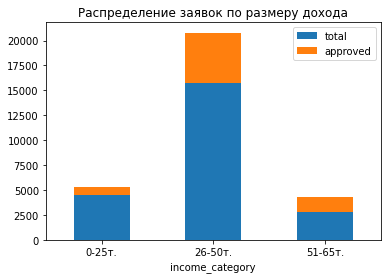

In [95]:
income_data = data.pivot_table(index='income_category', values='approved', aggfunc=['count', 'sum'])
income_data.columns = ['total', 'approved']
income_data.plot(kind='bar', stacked=True, title='Распределение заявок по размеру дохода')

plt.xticks(rotation=0)
plt.savefig('income_total.png')

In [69]:
(
    data
    .pivot_table(index='income_category', values=['approved', 'bad'])
    .sort_values(by='approved', ascending=False)
    .style.format('{:.2f}')
    .highlight_max(subset=['approved'], color='yellowgreen')
    .highlight_min(subset=['approved'], color='coral')
    .highlight_max(subset=['bad'], color='coral')
    .highlight_min(subset=['bad'], color='yellowgreen')
)

,approved,bad
income_category,,
51-65т.,0.51,0.22
26-50т.,0.32,0.28
0-25т.,0.18,0.28


После разбиения клиентов на группы по уровню дохода зависимость стала более наглядной. Распределение стремится к нормальному. Наибольшее количество заявок зарегистрировано от людей со средним уровнем дохода (от 25 до 50 тыс.). Более низкие или высокие значения дохода встречаются реже. Тем не менее, зависимость вероятности, что кредит одобрят, прямо зависит от уровня зарплаты. **Чем выше уровень дохода, тем больше шанс получить положительный ответ.** Так, заявки клиентов с доходом выше среднего были одобрены в 51% случаев, а вот клиентов с доходом ниже - всего лишь в 18%.

Люди с высоким доходом также имеют и меньшее количество просроченных кредитов - всего около четверти от всех выданных. Для остальных же категорий доля просроченных кредитов почти одинакова - 28%.

<a id="history"></a>
#### 5. Кредитная история

Кроме представленных, в данных также содержится множество переменных, характеризующих кредитную историю клиента, которую однозначно учитывают при принятии решения по заявке. Исследовать влияние каждого параметра по отдельности достаточно долго. Однако поскольку все параметры числовые, можно сравнить их средние значения для одобренных и неодобренных заявок:

In [96]:
hist_data = data.loc[:, 'cred_sum_cc_all':'all_creds_count_lm']
(
    data
    .pivot_table(index=['approved'], values=hist_data.columns, aggfunc='mean')
    .T
    .style.format('{:,.2f}')
    .background_gradient(cmap='Greens', axis=1)
)

approved,0,1
all_active_creds_sum_all,"82,021.47","229,576.36"
all_closed_creds_sum_all,"116,558.61","271,742.53"
all_closed_creds_sum_ly,"10,767.84","72,148.61"
all_creds_count_all,7.89,19.07
all_creds_count_lm,0.45,2.45
bank_inqs_count_quarter,2.45,6.62
count_overdue_all_3lm,0.13,0.08
cred_day_overdue_all_sum_all,369.26,18.97
cred_max_overdue_max_3lm,929.97,"1,493.37"
cred_max_overdue_max_ly,"4,470.34","3,200.18"


В большинстве случаев средние значения параметров значительно различаются для одобренных и неодобренных заявок. Клиенты, получившие положительный ответ, как правило, характеризуются **более наполненной и "хорошей" кредитной историей**. В частности, имеют бОльшее количество кредитов, на бОльшие суммы, однако, выигрывают и по количествам и суммам закрытых кредитов. При этом, у них меньше кредитов "на просрочке" и значительно меньше дней задержек платежей по активным займам.

Аналогичным способом исследовать влияние всех этих факторов на просрочку кредита не получится, поскольку средние значения будут различаться незначительно, да и коэффициенты матрицы корреляции не помогут сделать однозначных выводов.

### Вывод

В рамках данного небольшого исследования был проведен анализ данных, содержащих информацию о клиентах и их кредитных заявках. Перед проведением анализа данные были проверены на наличие пропусков и некорректных значений. В исследовательской части было изучено влияние основных параметров на одобрение кредитной заявки и просрочку кредита, в частности, рассмотрено распределение заявок по регионам, влияение профессиональной деятельности и дохода клиента, а также его кредитной истории в общем.

**Основные выводы:**
- Только треть зарегистрированных заявок были одобрены, из них - чуть больше четверти кредитов просрочено.
- Москва и Московская область лидируют по количеству зарегистрированных заявок.
- Байконур, Магаданская и Смоленская область - по количеству одобренных заявок.
- А вот просроченных кредитов больше всего в Астраханской области (около 50%), меньше - в Ярославской (всего 13%).
- Больше всего заявок на кредит подают представители рабочих профессий, они же их и чаще всего не возвращают вовремя.
- Госслужащим доверяют больше, т.к. всего пятая часть выданных им кредитов просрочена.
- Большая часть заявок зарегистрирована от представителей среднего класса.
- Чем больше уровень дохода, тем больше вероятность получить положительный ответ по заявке и того, что клиент вернет кредит.
- Одобрение по заявке, как правило, получают люди с более наполненной и "хорошей" кредитной историей.

Поскольку данные чистые и представлены в достаточном объеме, в дальнейшем возможно использовать их для решения задач кредитного скоринга с использованием машинного обучения. Это позволит спрогнозировать кредитоспособность приходящих клиентов и вероятность получения одобрения по заявке.